In [ ]:
#the code is done by the collaboration between Khaled_Waleed_Elzend & Amgad Abdallah & Samar Ghanam

In [ ]:
!pip install pystan
!pip install corner

In [ ]:
!pip install corner

In [ ]:
#libiraries that we might need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import scipy.constants as const
import scipy.integrate as intg
# from scipy.integrate import quad, dblquad
from scipy.interpolate import make_interp_spline
import stan
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize

# importing the style package
from matplotlib import style


# creating class for the ΛCDM  model

class LCDM:
    #we put the variable that we will use frequantly
    def __init__ (self, H0, omega_M, omega_L):
        self.H0 = H0
        self.omega_M = omega_M
        self.omega_L = 1-omega_L
    #angular size distance
    def E(self,z):
        return np.sqrt(self.omega_M * (1+z)**3 + self.omega_L)
    #the reciprocal of the angular size distance
    def E_recp(self, z):
        return 1./self.E(z)
    # Hubble function
    def Hubble(self,z):
        return self.H0*self.E(z)
    #comoving distance
    def D_c(self,z):
        return self.D_H(z) * np.array([intg.quad(self.E_recp, 0, x)[0] for x in z])
    #angular distanc
    def D_A(self,z):
        return self.D_c(z) / (1+z)
    #Luminosity distance
    def D_L(self, z):
        return (1+z) * self.D_c(z)
    # the Hubble distance
    def D_H(self,z):
        return 1e-3*const.c/self.H0
    # here we defined the parsec
    def pc(self,z):
        return 10*3.0857*10**16
    #distance modulus
    def dis_Modulus(self,z):
        return 5*np.log10(self.D_L(z)) + 25
    #comoving volume
    def dv(self,z):
        return self.D_H(z)*self.D_A(z)**2 * (1+z)**2 /(self.E(z))*4*const.pi
    def fit(self, z, H0, omega_M, omega_L, M):
        p = 5*np.log10((1+z) * 1e-3*const.c/ H0 * np.array([intg.quad(lambda x: 1/np.sqrt(omega_M*(1+x)**3+omega_L), 0, x)[0] for x in z])) + M
        return p
    #comoving volume

    # def omega(self, z):
    #     f = lambda phi, theta,z: np.sin(theta)*self.D_H(z)*(1+z)**2 * self.D_A(z)**2/(self.E(z))
    #     return np.array([intg.tplquad(f, 0, const.pi, 0, 2*const.pi, 0, x)[0] for x in z])
    # def dv(self,z):
    #     def integrand(z):
    #         return self.D_H(z)*(1+z)**2 * self.D_A(z)**2/(self.E(z)) * self.domega(z)
    #     return np.array([intg.quad(integrand, 0, x, epsabs=1e-12, epsrel=1e-12)[0] for x in z])

In [ ]:
# !pip install emcee

making arraies for each world model


In [ ]:
#z = np.linspace(0,  2.5, 10000)
z = np.linspace(0, 2.65, 1024)

Einstein = LCDM(69.8,1,0)
low_density= LCDM(69.8,0.05, 0)
high_lambda = LCDM(69.8,0.2, 0.8)
Standard = LCDM(69.8,0.3, 0.7)

In [ ]:
Standard.dis_Modulus(z)
#print (z)

<ipython-input-4-700a7a262d42>:59: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(self.D_L(z)) + 25


array([       -inf, 30.78980728, 32.29844945, ..., 46.92417682,
       46.92666166, 46.92914402])

making plots for  quantity Dc

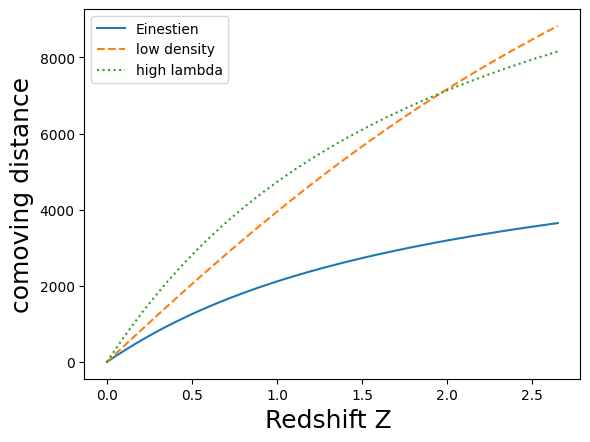

In [ ]:
Comoving_dis=Einstein.D_c(z)
Comoving_dis2=low_density.D_c(z)
Comoving_dis3=high_lambda.D_c(z)

plt.xlabel('Redshift Z ',fontsize=18)
plt.ylabel('comoving distance',fontsize=18)
plt.plot(z,Comoving_dis)
plt.plot(z,Comoving_dis2,linestyle="dashed")
plt.plot(z,Comoving_dis3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

making a plot for Angular diameter distance

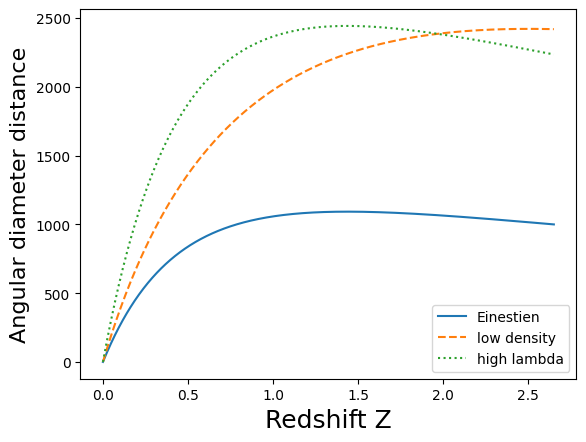

In [ ]:
Angular_diameter=Einstein.D_A(z)
Angular_diameter2=low_density.D_A(z)
Angular_diameter3=high_lambda.D_A(z)
plt.xlabel("Redshift Z",fontsize=18)
plt.ylabel("Angular diameter distance",fontsize=16)
plt.plot(z,Angular_diameter)
plt.plot(z,Angular_diameter2,linestyle="dashed")
plt.plot(z,Angular_diameter3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

a plot for Luminosity distance D_l

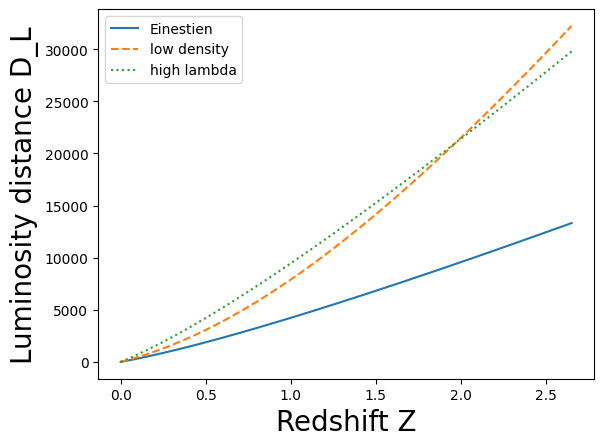

In [ ]:
plt.xlabel('Redshift Z', fontsize=20)
plt.ylabel('Luminosity distance D_L',fontsize=20)
Luminosity=Einstein.D_L(z)
Luminosity2=low_density.D_L(z)
Luminosity3=high_lambda.D_L(z)
plt.plot(z,Luminosity)
plt.plot(z,Luminosity2,linestyle="dashed")
plt.plot(z,Luminosity3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

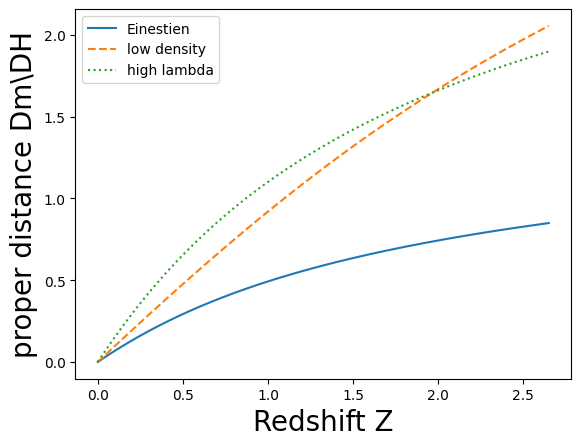

In [ ]:
plt.xlabel('Redshift Z', fontsize=20)
plt.ylabel('proper distance Dm\DH',fontsize=20)
w=Einstein.D_c(z)/Einstein.D_H(z)
w_2=low_density.D_c(z)/low_density.D_H(z)
w_3=high_lambda.D_c(z)/high_lambda.D_H(z)
plt.plot(z,w)
plt.plot(z,w_2,linestyle="dashed")
plt.plot(z,w_3,linestyle=':')
plt.legend(['Einestien','low density','high lambda'])

plt.show()

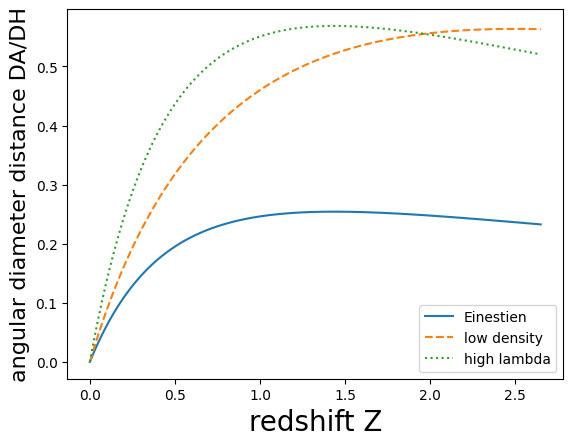

In [ ]:
result_1=Einstein.D_A(z)/Einstein.D_H(z)
result_2=low_density.D_A(z)/low_density.D_H(z)
result_3=high_lambda.D_A(z)/high_lambda.D_H(z)
plt.xlabel('redshift Z',fontsize=20)
plt.ylabel('angular diameter distance DA/DH',fontsize=16)
plt.plot(z,result_1)
plt.plot(z,result_2,linestyle="dashed")
plt.plot(z,result_3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

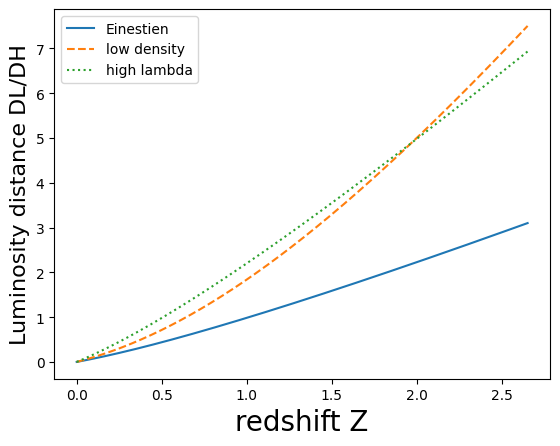

In [ ]:
result_4=Einstein.D_L(z)/Einstein.D_H(z)
result_5=low_density.D_L(z)/low_density.D_H(z)
result_6=high_lambda.D_L(z)/high_lambda.D_H(z)
plt.xlabel('redshift Z',fontsize=20)
plt.ylabel('Luminosity distance DL/DH',fontsize=16)
plt.plot(z,result_4)
plt.plot(z,result_5,linestyle="dashed")
plt.plot(z,result_6,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()



<ipython-input-4-700a7a262d42>:59: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(self.D_L(z)) + 25


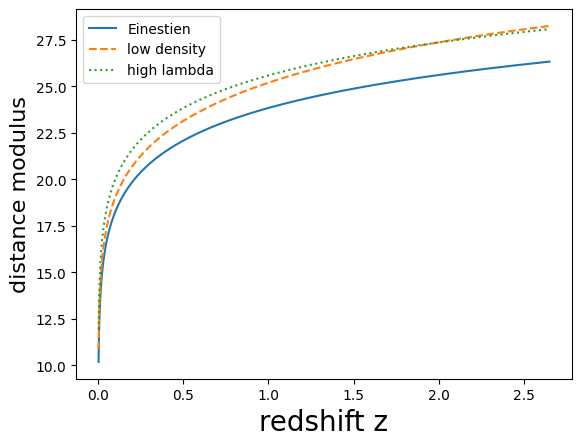

In [ ]:
result_7=Einstein.dis_Modulus(z)-19.3
result_8=low_density.dis_Modulus(z)-19.3
result_9=high_lambda.dis_Modulus(z)-19.3
plt.xlabel('redshift z',fontsize=20)
plt.ylabel('distance modulus',fontsize=16)
plt.plot(z,result_7)
plt.plot(z,result_8,linestyle="dashed")
plt.plot(z,result_9,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])
plt.show()



comoving volume element plot

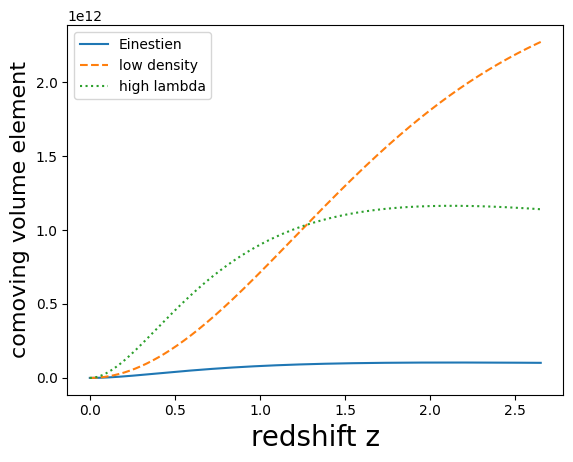

In [ ]:
result_10=Einstein.dv(z)
result_11=low_density.dv(z)
result_12=high_lambda.dv(z)
plt.xlabel('redshift z',fontsize=20)
plt.ylabel('comoving volume element',fontsize=16)
plt.plot(z,result_10)
plt.plot(z,result_11,linestyle="dashed")
plt.plot(z,result_12,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])
plt.show()

In [ ]:
df = pd.read_csv('mB_observ1.txt', sep=" ")
df.columns =["z","m","error"]
s=np.array(df["m"].abs())
# 0.5 * (mb-mth/std(mb))**2
z_obs=df['z']
chi_array=[]
H0_arr = range(50,100)
for x in H0_arr:
    m_th=(LCDM(x, 0.7, 0.3).dis_Modulus(z_obs) - 19.3).tolist()
    chi_array.append( 0.5* np.sum(((df['m'] - m_th )/ np.std(df['m']))**2))




In [ ]:
chi_array

[9.493937491664152,
 7.590606117456208,
 5.988675285212456,
 4.671672561801556,
 3.624234118449629,
 2.832013271900875,
 2.281597986749891,
 1.9604363239398976,
 1.8567689505531249,
 1.9595679375745338,
 2.2584811682039323,
 2.7437817619396245,
 3.406321991071987,
 4.237491228084981,
 5.22917751617568,
 6.373732401845058,
 7.663938709283948,
 9.092980971914951,
 10.65441826766643,
 12.342159231951573,
 14.15043904641962,
 16.07379822277363,
 18.107063019688887,
 20.24532734743524,
 22.483936029485942,
 24.818469303419228,
 27.244728454996228,
 29.75872248960234,
 32.35665575442866,
 35.03491643297253,
 37.790065840774716,
 40.618828457879076,
 43.51808263939419,
 46.48485195082619,
 49.51629707961041,
 52.60970827855296,
 55.76249830075487,
 58.97219578907649,
 62.236439086351005,
 65.55297043540412,
 68.91963054051881,
 72.33435346432572,
 75.79516183622272,
 79.3001623503597,
 82.84754153298078,
 86.43556176051538,
 90.06255751126818,
 93.72693183488855,
 97.42715302501415,
 101.1617

In [ ]:
min(chi_array)


1.8567689505531249


from that index we know that the most minimum value for chi2 coressponds to an index 1 so H_0 wil be equal to 51



here we will try to get the fitting done

<ipython-input-4-700a7a262d42>:59: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(self.D_L(z)) + 25


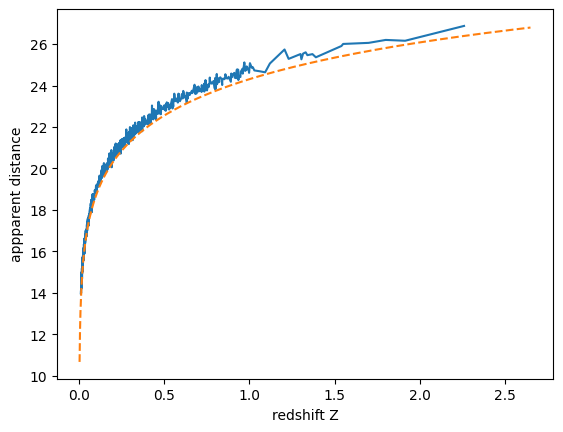

In [ ]:
# we will plot what we have got from our calculations
best_fit_line=LCDM(67, 0.7, 0.3).dis_Modulus(z) - 19.3
plt.plot(df['z'],df['m'],label="real data")
plt.plot(z,best_fit_line,label="fit",linestyle="dashed")
plt.xlabel("redshift Z")
plt.ylabel("appparent distance")
plt.show()

In [ ]:
f = pd.read_csv('mB_observ1.txt', sep=" ")
df.columns =["z","m","error"]
s=np.array(df["m"].abs())
# 0.5 * (mb-mth/std(mb))**2
z_obs=np.array(df['z'])
chi_array=[]
index_array = []
H0_arr = []
y=[]
k_1=[]
h=60
y_0=0
k_2=1
while h < 70 :
  h+=1
  H0_arr.append(h)
while y_0<1 :
  y_0+=0.1
  y.append(y_0)
for i in range(10):
  numbers=1-i*0.1
  k_1.append(numbers)

for num in H0_arr:
    for j in y:
        for k in k_1:
          if k+j==1:
              m_th = (LCDM(num, j, k).dis_Modulus(z_obs) - 19.3).tolist()
              chi_array.append(0.5 * np.sum(((df['m'] - m_th) / np.std(df['m'])) ** 2))
              index_array.append([num, j, k])
          else:
            chi_array.append(1000000000000)
            index_array.append([num,j,k])

w=min(chi_array)

desired=chi_array.index(w)

In [ ]:
desired

925

In [ ]:
index_array[desired]

[69, 0.5, 0.5]

so it is clear that what fits our data is H_0=69 , omega_m=0.5 omega_l=0.5


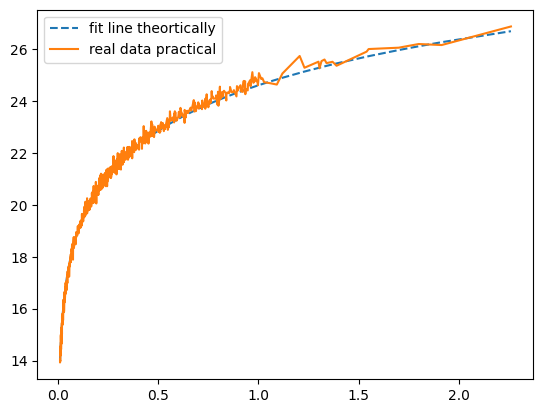

In [ ]:
final_fit_line=LCDM(69, 0.5, 0.5)
final_result=final_fit_line.dis_Modulus(z_obs)-19.3
#c=LCDM(70, 0.35000000000000014, 0.6499999999999999).dis_Modulus(z_obs)-19.3
plt.plot(df['z'],final_result,label="fit line theortically",linestyle="dashed")
#plt.plot(df['z'],c,label='70,0.29,0.71')
plt.plot(df['z'],df['m'],label="real data practical")
plt.legend()
plt.show()
